# Bab 7: Ensemble Learning and Random Forests

### 1. Pendahuluan

Bab 7 membahas *Ensemble Learning*, sebuah teknik *Machine Learning* yang kuat di mana Anda melatih beberapa prediktor (pengklasifikasi atau regressor) yang berbeda, kemudian menggabungkan prediksi mereka untuk mendapatkan hasil yang lebih baik. Metode *Ensemble* biasanya mengungguli model tunggal terbaik. Bab ini akan mencakup konsep inti *Ensemble Learning*, beberapa algoritma *ensemble* populer seperti Bagging, Boosting, dan Stacking, serta bagaimana mengimplementasikan Random Forests.

### 2. Voting Classifiers (Pengklasifikasi Voting)

Jika Anda melatih beberapa pengklasifikasi (misalnya, Regresi Logistik, SVM, Random Forest, K-Nearest Neighbors) dan masing-masing mencapai akurasi 80%, Anda mungkin dapat mencapai akurasi yang lebih tinggi jika Anda menggabungkan prediksi mereka. Pengklasifikasi *voting* bekerja dengan mengumpulkan prediksi dari setiap pengklasifikasi dan memprediksi kelas yang paling sering dipilih (untuk *hard voting*) atau yang memiliki probabilitas rata-rata tertinggi (untuk *soft voting*).

* **Hard Voting (Mayoritas Langsung):** Memprediksi kelas yang menerima suara terbanyak. Ini bekerja bahkan jika pengklasifikasi memiliki tipe yang berbeda.
* **Soft Voting (Mayoritas Probabilitas):** Memprediksi kelas dengan probabilitas kelas rata-rata tertinggi di antara semua pengklasifikasi. Ini membutuhkan semua pengklasifikasi untuk dapat memprediksi probabilitas (misalnya, `predict_proba()`). *Soft voting* seringkali mengungguli *hard voting* karena memberikan bobot lebih pada prediksi dengan kepercayaan diri tinggi.

Agar pengklasifikasi *ensemble* dapat bekerja dengan baik, mereka haruslah beragam (membuat jenis kesalahan yang berbeda). Jika mereka semua membuat kesalahan yang sama, menggabungkannya tidak akan banyak membantu.

Contoh implementasi menggunakan `VotingClassifier` dari Scikit-Learn ditunjukkan. Pengklasifikasi SVM seringkali tidak memiliki metode `predict_proba()`, namun di Scikit-Learn Anda bisa mengaktifkannya dengan menyetel `probability=True` saat membuat `SVC`, meskipun ini akan menambah overhead komputasi.

### 3. Bagging dan Pasting (Bagging and Pasting)

Kedua strategi ini melibatkan pelatihan beberapa *predictor* dari jenis yang sama pada subset acak dari *training set*.
* **Bagging (Bootstrap Aggregation):** Pengambilan sampel dilakukan **dengan penggantian** (*with replacement*).
* **Pasting:** Pengambilan sampel dilakukan **tanpa penggantian** (*without replacement*).

Setiap *predictor* dilatih secara independen dan kemudian prediksi digabungkan: untuk klasifikasi, dengan *hard voting*; untuk regresi, dengan menghitung rata-rata. Karena semua *predictor* dilatih secara paralel, Bagging/Pasting sangat cocok untuk pemrosesan paralel.

Bagging dan Pasting mengurangi *variance* (mengurangi *overfitting*) dari model dasar, tetapi sedikit meningkatkan *bias*. Ini adalah salah satu cara untuk meningkatkan kinerja model yang kompleks atau rentan *overfitting* seperti Decision Trees.

Contoh implementasi menggunakan `BaggingClassifier` dari Scikit-Learn ditunjukkan, menggunakan Decision Trees sebagai *base estimator*.

#### a. Out-of-Bag Evaluation (Evaluasi Out-of-Bag)

Dengan Bagging, karena pengambilan sampel dilakukan dengan penggantian, beberapa *instance training* mungkin tidak pernah diambil sampelnya untuk subset pelatihan *predictor* tertentu. Sekitar 37% dari *instance training* tidak akan pernah diambil sampelnya untuk pelatihan *predictor* tertentu. *Instance-instance* ini disebut *out-of-bag (oob)* *instance*.

Evaluasi *oob* memungkinkan pengujian setiap *predictor* pada *instance* yang tidak pernah dilihatnya selama pelatihan. Dengan rata-rata skor *oob* di semua *predictor*, kita bisa mendapatkan estimasi kinerja model tanpa perlu *validation set* terpisah.

* Penggunaan `oob_score=True` pada `BaggingClassifier` mengaktifkan fitur ini.
* Skor *oob* tersedia melalui atribut `oob_score_`.
* Keputusan *oob* untuk setiap *instance* juga dapat diakses melalui `oob_decision_function_` atau `oob_proba_`.

### 4. Random Forests (Hutan Acak)

*Random Forests* adalah *ensemble* dari Decision Trees, biasanya dilatih dengan metode Bagging, tetapi dengan satu perbedaan kunci:
* Ketika membangun pohon, setiap *node* hanya mempertimbangkan subset acak dari fitur untuk pembagian optimal, daripada mencari fitur terbaik di semua fitur.

Kebiasaan acak ini (disebut `max_features` di Scikit-Learn) menghasilkan keragaman pohon yang lebih besar, yang pada gilirannya mengurangi *variance* lebih lanjut dan menghasilkan model yang lebih baik.

Contoh implementasi menggunakan `RandomForestClassifier` dari Scikit-Learn ditunjukkan. Kelas ini mendukung semua *hyperparameter* dari `DecisionTreeClassifier` (misalnya, `max_depth`, `min_samples_leaf`) dan juga `n_estimators` (jumlah pohon) dan `max_features` (jumlah fitur yang dipertimbangkan untuk setiap pembagian).

#### a. Feature Importance (Pentingnya Fitur)

Random Forests dapat mengukur pentingnya setiap fitur dengan melihat seberapa banyak fitur tersebut mengurangi *impurity* rata-rata di seluruh pohon dalam *ensemble*. Fitur-fitur yang sering digunakan di dekat *root* pohon dan secara signifikan mengurangi *impurity* akan dianggap lebih penting.

Scikit-Learn menghitung skor ini secara otomatis setelah pelatihan dan menyediakannya melalui atribut `feature_importances_`. Fitur ini sangat berguna untuk seleksi fitur atau untuk memahami data Anda. Contoh perhitungan pentingnya fitur untuk dataset MNIST ditunjukkan.

### 5. Boosting

*Boosting* mengacu pada keluarga metode *ensemble* di mana *predictor* dilatih secara berurutan, dengan setiap *predictor* baru mencoba mengoreksi kesalahan *predictor* sebelumnya. Ini berarti pelatihan tidak dapat diparalelkan.

#### a. AdaBoost (Adaptive Boosting)

*AdaBoost* melatih *predictor* baru dengan memberikan bobot lebih pada *instance training* yang salah diklasifikasikan oleh *predictor* sebelumnya.
* Pada setiap iterasi, algoritma melatih *predictor* baru dan mengevaluasi kinerja pada *training set*.
* Kemudian, bobot *instance* yang salah diklasifikasikan ditingkatkan.
* Akhirnya, semua *predictor* digabungkan menggunakan *voting* berbobot, di mana bobot *predictor* sebanding dengan akurasinya.

Fungsi bobot *instance* untuk AdaBoost:
$ \text{new\_weight}^{(i)} = \text{weight}^{(i)} \times \exp(\alpha \times \text{error\_indicator}^{(i)}) $
di mana $\alpha$ adalah bobot *predictor* dan $\text{error\_indicator}^{(i)}$ adalah 1 jika *instance* ke-$i$ salah diklasifikasikan, dan 0 jika benar.

Contoh implementasi menggunakan `AdaBoostClassifier` dari Scikit-Learn ditunjukkan. Algoritma ini rentan *overfitting* jika terlalu banyak *estimator* atau *base estimator* terlalu kompleks.

#### b. Gradient Boosting

*Gradient Boosting* juga melatih *predictor* secara berurutan, tetapi alih-alih menyesuaikan bobot *instance* yang salah klasifikasi, ia menyesuaikan *predictor* baru dengan sisa (*residuals*) dari *predictor* sebelumnya. Artinya, setiap *predictor* dilatih untuk memprediksi *error* dari *ensemble* yang ada.

Contoh implementasi menggunakan `GradientBoostingRegressor` (untuk regresi) dan `GradientBoostingClassifier` (untuk klasifikasi) dari Scikit-Learn ditunjukkan.

* *Hyperparameter* penting: `n_estimators` (jumlah *tree*), `learning_rate` (ukuran langkah untuk koreksi *residual*), dan `max_depth` (regularisasi *base estimator*).
* **Shrinkage:** Mengurangi *learning_rate* dan meningkatkan `n_estimators` adalah teknik regularisasi yang disebut *shrinkage*.
* **Early Stopping:** Dapat diimplementasikan dengan `subsample` (sampling sebagian data) atau dengan memantau kinerja pada *validation set*.

**XGBoost:**
`XGBoost` (Extreme Gradient Boosting) adalah implementasi *Gradient Boosting* yang sangat dioptimalkan dan seringkali menjadi pilihan utama untuk tugas-tugas terstruktur. Ini memiliki kinerja yang sangat baik, cepat, dan memiliki banyak fitur penting seperti penanganan *missing values* secara otomatis dan regularisasi bawaan. Contoh penggunaan `XGBRegressor` ditunjukkan.

### 6. Stacking (Stacked Generalization)

*Stacking* (Stacked Generalization) adalah salah satu metode *ensemble* yang paling canggih. Alih-alih menggunakan fungsi *voting* sederhana atau strategi *boosting*, *stacking* melatih sebuah model untuk melakukan agregasi. Model ini disebut **blender** atau **meta-learner**.

Prosesnya adalah sebagai berikut:
1.  *Training set* dibagi menjadi dua subset.
2.  *Predictor* pertama dilatih pada subset pertama.
3.  Setiap *predictor* yang dilatih kemudian membuat prediksi pada *instance* di subset kedua. Ini menjadi *input* baru untuk *blender*.
4.  *Blender* dilatih pada *input* baru ini (output dari *predictor* tingkat pertama) dan target asli.

Ini memastikan bahwa *blender* dilatih pada data yang "bersih" (tidak bocor dari data pelatihan *predictor* tingkat pertama). Anda dapat memiliki beberapa lapisan *blender*.

Scikit-Learn tidak menyediakan kelas untuk Stacking secara langsung, tetapi implementasinya dapat dilakukan secara manual atau menggunakan pustaka pihak ketiga. Penulis memberikan gambaran umum tentang bagaimana logika ini bekerja.

### 7. Kesimpulan

Bab 7 memberikan pemahaman yang mendalam tentang *Ensemble Learning*, menunjukkan bagaimana menggabungkan beberapa model dapat secara signifikan meningkatkan kinerja. Berbagai strategi *ensemble* — *Voting*, *Bagging*, *Pasting*, *Random Forests*, *Boosting* (termasuk AdaBoost, Gradient Boosting, dan XGBoost), serta *Stacking* — dijelaskan secara detail dengan contoh implementasi. Pentingnya keragaman *predictor*, evaluasi *oob*, dan pentingnya fitur dari Random Forests juga disoroti.

## 1. Voting Classifiers

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(gamma="scale", random_state=42) # Removed probability=True for hard voting

In [2]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [3]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### Soft Voting

In [4]:
# SVC needs probability=True for soft voting
svm_clf_proba = SVC(gamma="scale", probability=True, random_state=42) 
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf_proba)],
    voting='soft'
)
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [5]:
for clf in (log_clf, rnd_clf, svm_clf_proba, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## 2. Bagging and Pasting

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.904

In [8]:
# Comparing with a single Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.856

### Out-of-Bag Evaluation

In [9]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [10]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

In [11]:
bag_clf.oob_decision_function_

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06145251, 0.93854749],
       [0.35465116, 0.64534884],
       [0.01142857, 0.98857143],
       [0.98930481, 0.01069519],
       [0.97927461, 0.02072539],
       [0.75586854, 0.24413146],
       [0.0049505 , 0.9950495 ],
       [0.75520833, 0.24479167],
       [0.82122905, 0.17877095],
       [0.98461538, 0.01538462],
       [0.06315789, 0.93684211],
       [0.00490196, 0.99509804],
       [0.99004975, 0.00995025],
       [0.92513369, 0.07486631],
       [1.        , 0.        ],
       [0.03409091, 0.96590909],
       [0.35087719, 0.64912281],
       [0.91111111, 0.08888889],
       [1.        , 0.        ],
       [0.96319018, 0.03680982],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6635514 , 0.3364486 ],
       [0.

## 3. Random Forest

In [12]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred_rf)

0.912

### Feature Importance

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


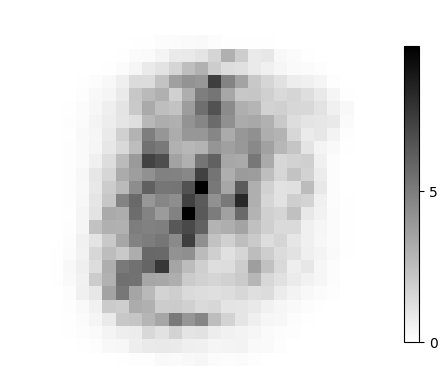

In [29]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist["data"]
y_mnist = mnist["target"].astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

# A function to plot a digit (from earlier chapters/notebooks) would be needed here
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = "binary",
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_.reshape(28, 28))
cbar = plt.colorbar(ticks=[0, 0.005, 0.010, 0.015, 0.020, 0.025], shrink=0.8)
cbar.ax.set_yticklabels(["0", "5", "10", "15", "20", "25"])
plt.show()

## 4. Boosting

### AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [19]:
y_pred_ada = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)

0.896

### Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Generate some noisy quadratic data (as in Chapter 6)
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y.ravel()) # .ravel() for 1D target array

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [21]:
# More trees, smaller learning rate
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y.ravel())

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

### Gradient Boosting with Early Stopping

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train_gb, X_val_gb, y_train_gb, y_val_gb = train_test_split(X, y.ravel(), random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train_gb, y_train_gb)

errors = [mean_squared_error(y_val_gb, y_pred)
          for y_pred in gbrt.staged_predict(X_val_gb)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train_gb, y_train_gb)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(39),
                          random_state=42)